# Exercise 1: Clustering
**Goal:** Implement the clustering algorithm called Bisecting k-Means.

Bisecting k-Means is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:  
1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n×pmatrix (nobservations by pfeatures); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n×1 vector with the cluster indices for each of the n observations.

**Notes:**  
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

In [1]:
import numpy as np

def kmeans(X, num_clusters, max_iters=100):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, num_clusters, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = []
        for i in range(num_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(X[np.random.choice(n_samples)])
        new_centroids = np.array(new_centroids)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def calculate_sse(X, labels, centroids):
    sse = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

def bkmeans(X, k, iter):
    clusters = [X]
    centroids_list = []
    while len(clusters) < k:
        largest_cluster_index = np.argmax([len(cluster) for cluster in clusters])
        largest_cluster = clusters.pop(largest_cluster_index)
        
        best_sse = float('inf')
        best_labels = None
        best_centroids = None
        
        for _ in range(iter):
            labels, centroids = kmeans(largest_cluster, 2)
            sse = calculate_sse(largest_cluster, labels, centroids)
            if sse < best_sse:
                best_sse = sse
                best_labels = labels
                best_centroids = centroids
        
        cluster_1 = largest_cluster[best_labels == 0]
        cluster_2 = largest_cluster[best_labels == 1]
        
        clusters.append(cluster_1)
        clusters.append(cluster_2)
        
    final_labels = np.zeros(X.shape[0], dtype=int)
    for cluster_index, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            final_labels[point_index] = cluster_index
        centroids_list.append(cluster.mean(axis=0))
    
    return final_labels, np.array(centroids_list)

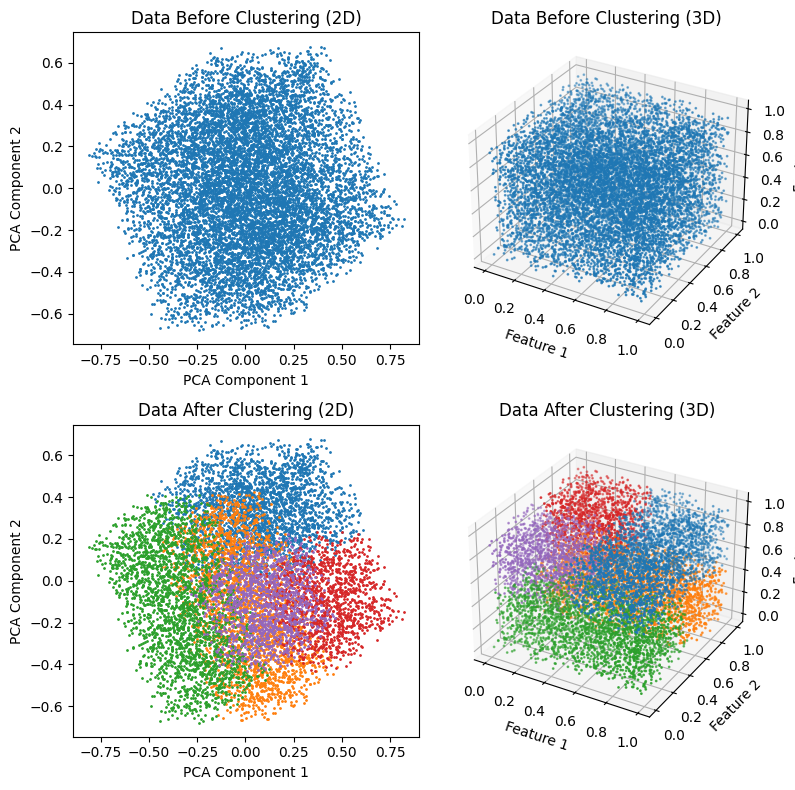

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.random.rand(10000, 3)
k = 5
iter = 10

# Visualize data before clustering in 2D
pca_2d = PCA(n_components=2)
X_reduced_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 8))  # Adjusted to make the plot square
plt.subplot(2, 2, 1)
plt.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], s=1)
plt.title("Data Before Clustering (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Visualize data before clustering in 3D
ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=1)
ax.set_title("Data Before Clustering (3D)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

final_labels, centroids = bkmeans(X, k, iter)

# Visualize data after clustering in 2D
plt.subplot(2, 2, 3)
for label in np.unique(final_labels):
    cluster_points = X_reduced_2d[final_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=1, label=f'Cluster {label}')
plt.title("Data After Clustering (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Visualize data after clustering in 3D
ax = plt.subplot(2, 2, 4, projection='3d')
for label in np.unique(final_labels):
    cluster_points = X[final_labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], s=1, label=f'Cluster {label}')
ax.set_title("Data After Clustering (3D)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.tight_layout()
plt.show()

# Exercise 2: Visualization of Results
In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots. This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. These could be data sets you already used in previous assignments, or you could download some new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

## Exercise 2.1: Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set. The resulting visualization should be a 3×3 matrix where each cell is a scatterplot of a DR technique applied to a data set. Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): In your opinion, which technique performed the best for each data set, regarding the separation of the classes? How are the classes in the data sets separated? Are some classes easier to separate than others?

## Exercise 2.2 Comparison of Clustering Techniques
Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. The resulting visualization should be a 3×3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): In your opinion, which clustering technique performed the best for each data set? How are the clusters in the data sets separated? Are some clusters easier to separate than others?